Davies-Bouldin Index: 1.5762024186549002


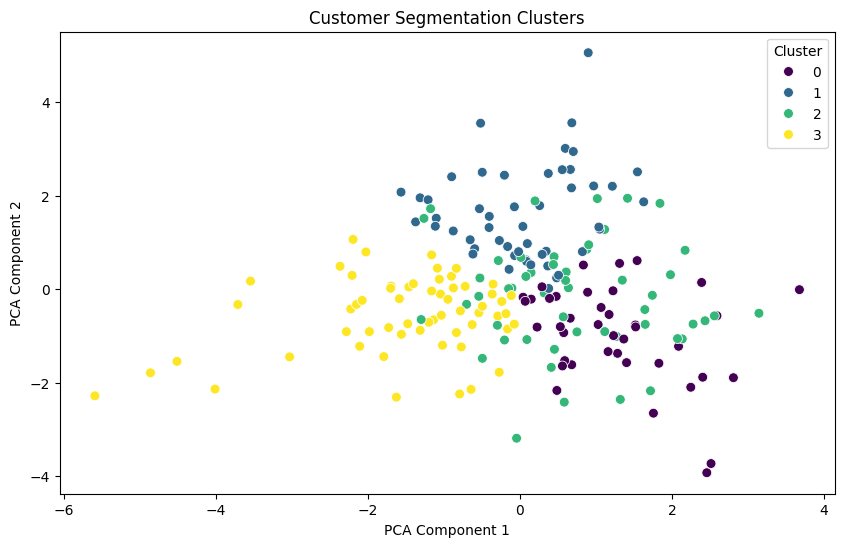

  CustomerID  Cluster
0      C0001        2
1      C0002        3
2      C0003        2
3      C0004        2
4      C0005        1


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
from sklearn.decomposition import PCA

customers = pd.read_csv("Customers.csv")
transactions = pd.read_csv("Transactions.csv")

customers["SignupDate"] = pd.to_datetime(customers["SignupDate"])

customers["DaysSinceSignup"] = (customers["SignupDate"].max() - customers["SignupDate"]).dt.days

customer_summary = transactions.groupby("CustomerID").agg({
    "Quantity": "sum",
    "Price": "mean"
}).reset_index()

customer_data = pd.merge(customers, customer_summary, on="CustomerID", how="left").fillna(0)

customer_data_encoded = pd.get_dummies(customer_data, columns=["Region"], drop_first=True)

features = ["Quantity", "Price", "DaysSinceSignup"] + list(customer_data_encoded.columns[4:])

scaler = StandardScaler()
normalized_data = scaler.fit_transform(customer_data_encoded[features])

num_clusters = 4
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
customer_data_encoded["Cluster"] = kmeans.fit_predict(normalized_data)

db_index = davies_bouldin_score(normalized_data, customer_data_encoded["Cluster"])
print(f"Davies-Bouldin Index: {db_index}")

def plot_clusters(data, labels, title):
    pca = PCA(n_components=2)
    reduced_data = pca.fit_transform(data)
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=reduced_data[:, 0], y=reduced_data[:, 1], hue=labels, palette="viridis", s=50)
    plt.title(title)
    plt.xlabel("PCA Component 1")
    plt.ylabel("PCA Component 2")
    plt.legend(title="Cluster")
    plt.show()

plot_clusters(normalized_data, customer_data_encoded["Cluster"], "Customer Segmentation Clusters")

customer_data_encoded.to_csv("Customer_Segmentation.csv", index=False)

print(customer_data_encoded[["CustomerID", "Cluster"]].head())
